In [ ]:
# mount data, see -> https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=In%20the%20notebook%2C%20click%20on,you%20are%20ready%20to%20go.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Data' # might have to change if different, see link above

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv(path+'/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test = pd.read_csv(path+'/application_test.csv')
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

The target variable 'TARGET' is the label, which indicates a 0 if the loan was repaid on time or 1 otherwise.

In [ ]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Let's take a look at the distributions of some features of interest.

### AGE

Text(0, 0.5, 'Count')

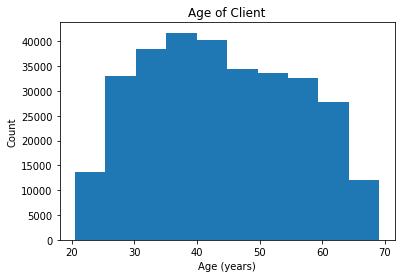

In [ ]:
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])  # for some reason birth is negative -> make positive

plt.hist(df_train['DAYS_BIRTH']/365)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

In [ ]:
print('min age:', min(df_train['DAYS_BIRTH']/365))
print('max age:', max(df_train['DAYS_BIRTH']/365))

print('median age:', df_train['DAYS_BIRTH'].median()/365)
print('mean age:', df_train['DAYS_BIRTH'].mean()/365)

min age: 20.517808219178082
max age: 69.12054794520547
median age: 43.15068493150685
mean age: 43.93697278587161


General age distribution seems to be expected. Lets look at per-target basis:

Text(0, 0.5, 'Count')

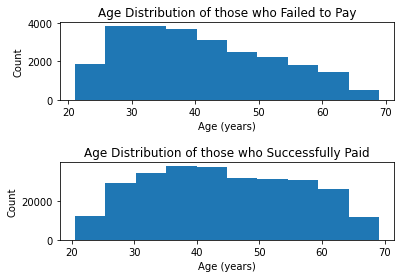

In [ ]:
fig, ax = plt.subplots(2,1)
fig.subplots_adjust(hspace=.8)

# for those who failed to repay
ax[0].hist(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH']/365)
ax[0].set_title('Age Distribution of those who Failed to Pay')
ax[0].set_xlabel('Age (years)')
ax[0].set_ylabel('Count')

# for those were able to repay
ax[1].hist(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH']/365)
ax[1].set_title('Age Distribution of those who Successfully Paid')
ax[1].set_xlabel('Age (years)')
ax[1].set_ylabel('Count')

Seems to be roughly similar, but for those who failed to pay, the age distribution seems more skewed right.

### GENDER

Text(0, 0.5, 'Count')

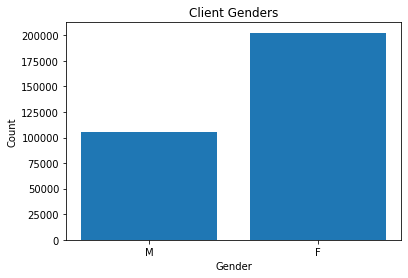

In [ ]:
genders = ['M','F']

plt.bar(genders, [len(df_train[df_train['CODE_GENDER']=='M']), len(df_train[df_train['CODE_GENDER']=='F'])])
plt.title('Client Genders')
plt.xlabel('Gender')
plt.ylabel('Count')

About 2x more females in the dataset than males.

Text(0, 0.5, 'Count')

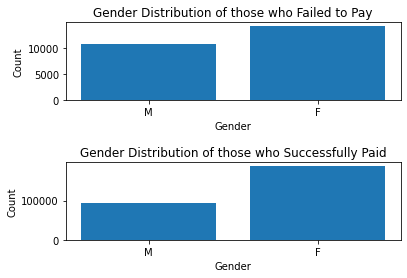

In [ ]:
len_m_t1 = len(df_train[(df_train['TARGET'] == 1) & (df_train['CODE_GENDER']=='M')])
len_f_t1 = len(df_train[(df_train['TARGET'] == 1) & (df_train['CODE_GENDER']=='F')])
len_m_t0 = len(df_train[(df_train['TARGET'] == 0) & (df_train['CODE_GENDER']=='M')])
len_f_t0 = len(df_train[(df_train['TARGET'] == 0) & (df_train['CODE_GENDER']=='F')])

fig, ax = plt.subplots(2,1)
fig.subplots_adjust(hspace=.8)

# for those who failed to repay
ax[0].bar(genders, [len_m_t1, len_f_t1])
ax[0].set_title('Gender Distribution of those who Failed to Pay')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')

# for those were able to repay
ax[1].bar(genders, [len_m_t0, len_f_t0])
ax[1].set_title('Gender Distribution of those who Successfully Paid')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Count')

Interestingly here, we see an uneven distribution of genders in those were able to successfully pay off the debt and those who were unable to. It seems that men had more difficulty paying off the debt compared to women.

### Correlations

Find correlations with target variable

In [ ]:
correlations = df_train.corr()['TARGET'].sort_values()

In [ ]:
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
Name: TARGET, dtype: float64


In [ ]:
df_pos = df_train[['TARGET','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY','FLAG_EMP_PHONE','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3']]
df_neg = df_train[['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_EMPLOYED','FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','ELEVATORS_AVG']]

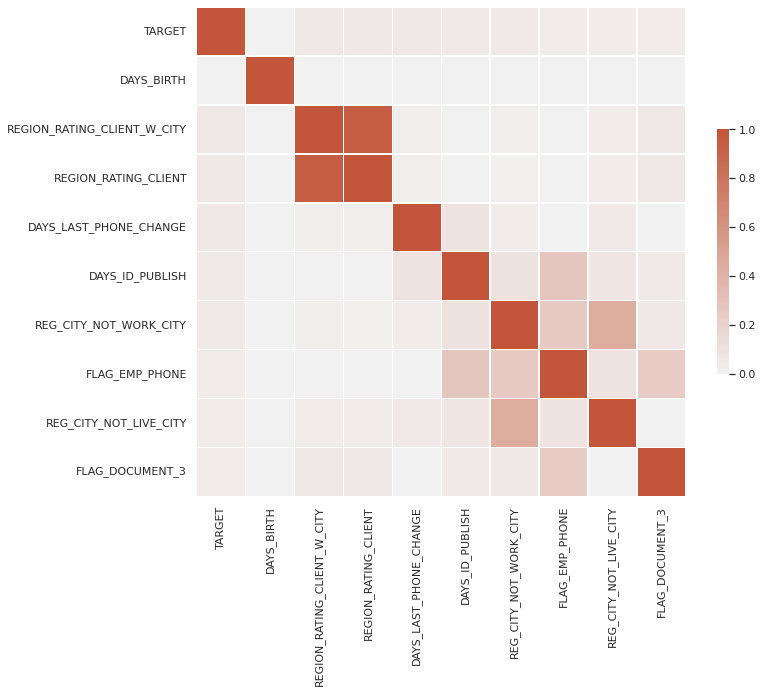

In [ ]:
sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_pos.corr(), cmap=cmap, vmin=0, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

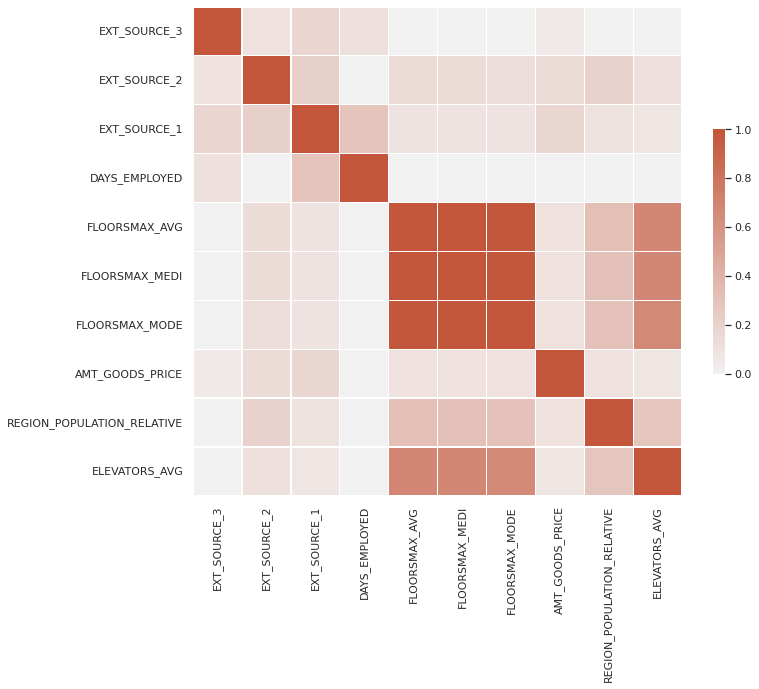

In [ ]:
sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_neg.corr(), cmap=cmap, vmin=0, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlations for Target/gender/age

In [ ]:
df_train.dropna(inplace=True)

df = df_train[['TARGET','DAYS_BIRTH','CODE_GENDER']]
df['CODE_GENDER'] = df_train['CODE_GENDER'].map({'F':0, 'M':1})
df['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])/365

correlation_df = df.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


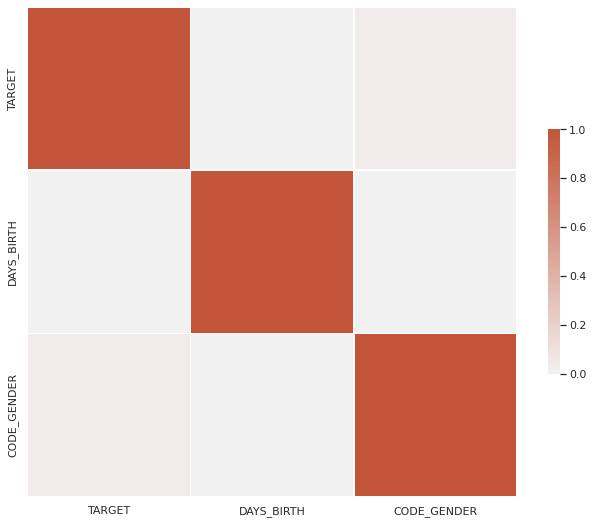

In [ ]:
sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_df, cmap=cmap, vmin=0, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0, 0.5, 'Count')

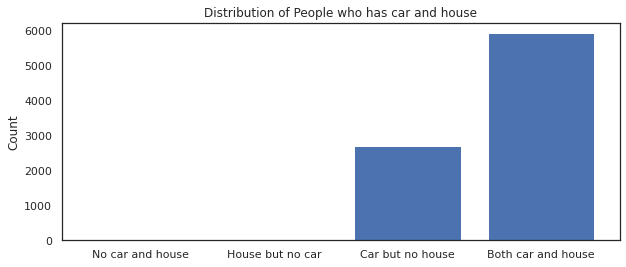

In [ ]:
leg = ['No car and house', 'House but no car', 'Car but no house', 'Both car and house']
len_t1 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='N')])
len_t2 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='N')])
len_t3 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='Y')])
len_t4 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='Y')])

fig = plt.figure(figsize = (10,4))
plt.bar(leg, [len_t1, len_t2, len_t3, len_t4])
plt.title('Distribution of People who has car and house')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

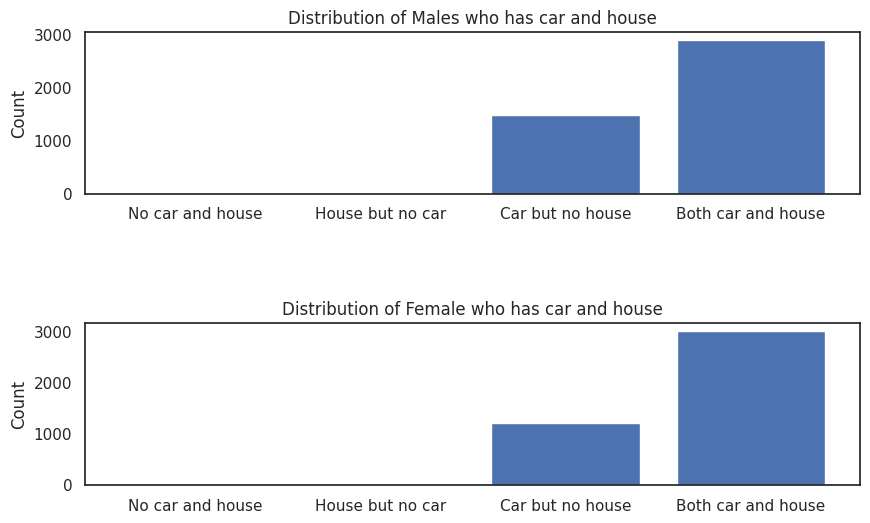

In [ ]:
leg = ['No car and house', 'House but no car', 'Car but no house', 'Both car and house']
len_m_t1 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='N') & (df_train['CODE_GENDER']=='M')])
len_m_t2 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='N') & (df_train['CODE_GENDER']=='M')])
len_m_t3 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='Y') & (df_train['CODE_GENDER']=='M')])
len_m_t4 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='Y') & (df_train['CODE_GENDER']=='M')])

len_f_t1 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='N') & (df_train['CODE_GENDER']=='F')])
len_f_t2 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='N') & (df_train['CODE_GENDER']=='F')])
len_f_t3 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='Y') & (df_train['CODE_GENDER']=='F')])
len_f_t4 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='Y') & (df_train['CODE_GENDER']=='F')])

fig, ax = plt.subplots(2, 1, figsize=(10,6), dpi=100)
fig.subplots_adjust(hspace=.8)

# male
ax[0].bar(leg, [len_m_t1, len_m_t2, len_m_t3, len_m_t4])
ax[0].set_title('Distribution of Males who has car and house')
ax[0].set_ylabel('Count')

# female
ax[1].bar(leg, [len_f_t1, len_f_t2, len_f_t3, len_f_t4])
ax[1].set_title('Distribution of Female who has car and house')
ax[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

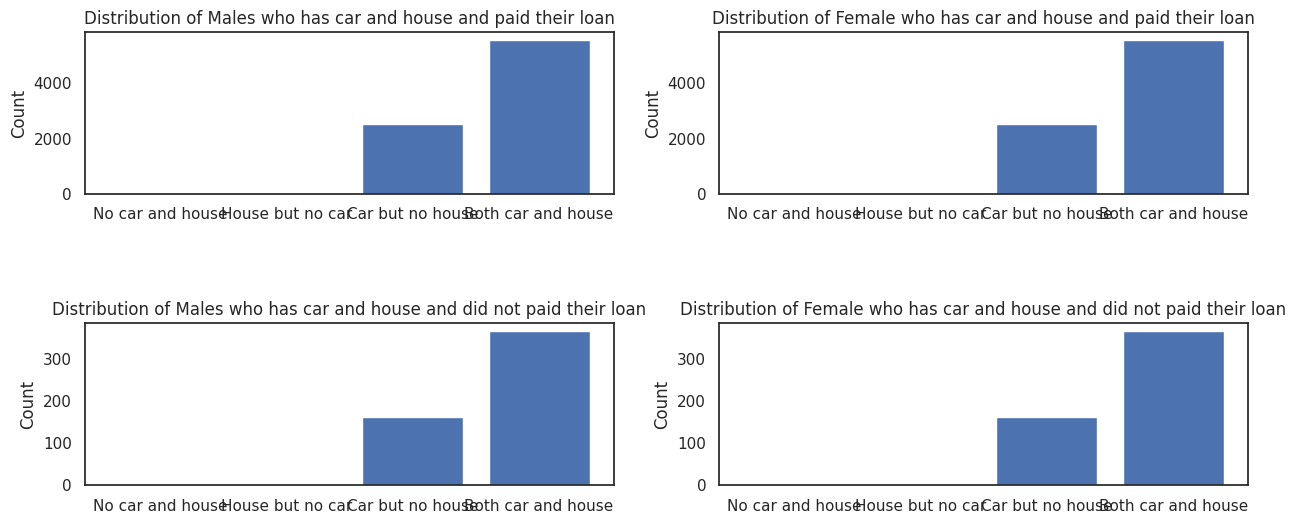

In [ ]:
leg = ['No car and house', 'House but no car', 'Car but no house', 'Both car and house']
len_m_t1 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='N') & (df_train['TARGET']==0)])
len_m_t2 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='N') & (df_train['TARGET']==0)])
len_m_t3 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='Y') & (df_train['TARGET']==0)])
len_m_t4 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='Y') & (df_train['TARGET']==0)])

len_f_t1 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='N') & (df_train['TARGET']==0)])
len_f_t2 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='N') & (df_train['TARGET']==0)])
len_f_t3 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='Y') & (df_train['TARGET']==0)])
len_f_t4 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='Y') & (df_train['TARGET']==0)])

fig, ax = plt.subplots(2, 2, figsize=(15,6), dpi=100)
fig.subplots_adjust(hspace=.8)

# male
ax[0][0].bar(leg, [len_m_t1, len_m_t2, len_m_t3, len_m_t4])
ax[0][0].set_title('Distribution of Males who has car and house and paid their loan')
ax[0][0].set_ylabel('Count')

# female
ax[0][1].bar(leg, [len_f_t1, len_f_t2, len_f_t3, len_f_t4])
ax[0][1].set_title('Distribution of Female who has car and house and paid their loan')
ax[0][1].set_ylabel('Count')

len_m_t1 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='N') & (df_train['TARGET']==1)])
len_m_t2 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='N') & (df_train['TARGET']==1)])
len_m_t3 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='Y') & (df_train['TARGET']==1)])
len_m_t4 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='Y') & (df_train['TARGET']==1)])

len_f_t1 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='N') & (df_train['TARGET']==1)])
len_f_t2 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='N') & (df_train['TARGET']==1)])
len_f_t3 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'N') & (df_train['FLAG_OWN_CAR']=='Y') & (df_train['TARGET']==1)])
len_f_t4 = len(df_train[(df_train['FLAG_OWN_REALTY'] == 'Y') & (df_train['FLAG_OWN_CAR']=='Y') & (df_train['TARGET']==1)])

# male
ax[1][0].bar(leg, [len_m_t1, len_m_t2, len_m_t3, len_m_t4])
ax[1][0].set_title('Distribution of Males who has car and house and did not paid their loan')
ax[1][0].set_ylabel('Count')

# female
ax[1][1].bar(leg, [len_f_t1, len_f_t2, len_f_t3, len_f_t4])
ax[1][1].set_title('Distribution of Female who has car and house and did not paid their loan')
ax[1][1].set_ylabel('Count')

In [ ]:
print(df_train.value_counts(['CODE_GENDER', 'NAME_EDUCATION_TYPE']).sort_index(kind='mergesort'))

CODE_GENDER  NAME_EDUCATION_TYPE          
F            Academic degree                     4
             Higher education                 2023
             Incomplete higher                 176
             Lower secondary                    10
             Secondary / secondary special    2008
M            Academic degree                     2
             Higher education                 1500
             Incomplete higher                 216
             Lower secondary                    25
             Secondary / secondary special    2638
dtype: int64


Text(0, 0.5, 'Count')

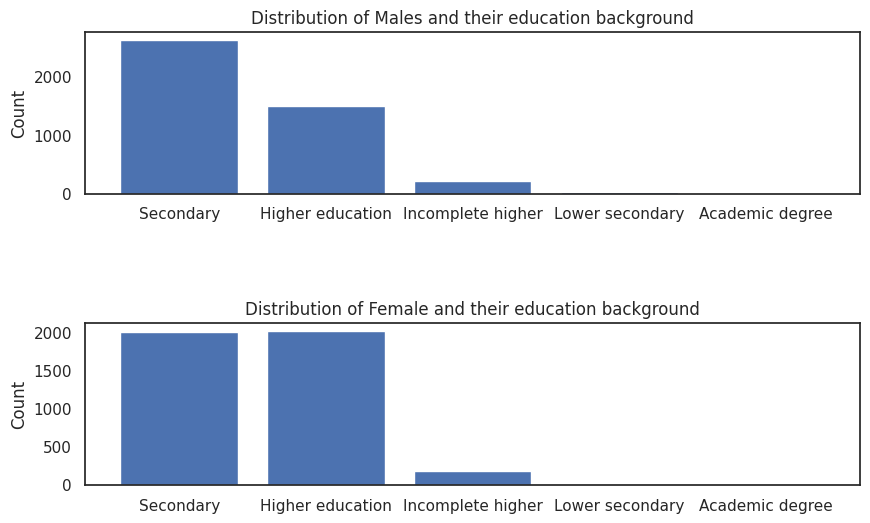

In [ ]:
leg = ['Secondary', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
len_m_t1 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special') & (df_train['CODE_GENDER']=='M')])
len_m_t2 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Higher education') & (df_train['CODE_GENDER']=='M')])
len_m_t3 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Incomplete higher') & (df_train['CODE_GENDER']=='M')])
len_m_t4 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Lower secondary') & (df_train['CODE_GENDER']=='M')])
len_m_t5 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Academic degree') & (df_train['CODE_GENDER']=='M')])

len_f_t1 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special') & (df_train['CODE_GENDER']=='F')])
len_f_t2 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Higher education') & (df_train['CODE_GENDER']=='F')])
len_f_t3 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Incomplete higher') & (df_train['CODE_GENDER']=='F')])
len_f_t4 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Lower secondary') & (df_train['CODE_GENDER']=='F')])
len_f_t5 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Academic degree') & (df_train['CODE_GENDER']=='F')])

fig, ax = plt.subplots(2, 1, figsize=(10,6), dpi=100)
fig.subplots_adjust(hspace=.8)

# male
ax[0].bar(leg, [len_m_t1, len_m_t2, len_m_t3, len_m_t4, len_m_t5])
ax[0].set_title('Distribution of Males and their education background')
ax[0].set_ylabel('Count')

# female
ax[1].bar(leg, [len_f_t1, len_f_t2, len_f_t3, len_f_t4, len_f_t5])
ax[1].set_title('Distribution of Female and their education background')
ax[1].set_ylabel('Count')


Text(0, 0.5, 'Count')

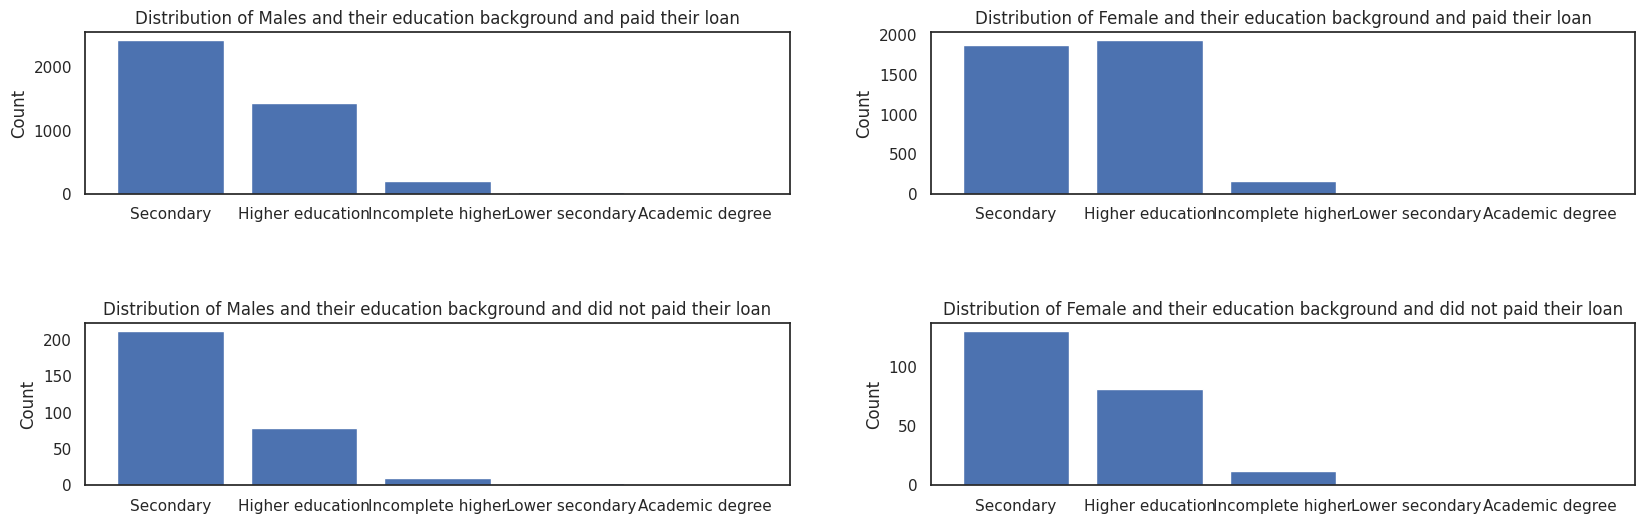

In [ ]:
leg = ['Secondary', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
len_m_t1 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special') & (df_train['CODE_GENDER']=='M') & (df_train['TARGET']==0)])
len_m_t2 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Higher education') & (df_train['CODE_GENDER']=='M') & (df_train['TARGET']==0)])
len_m_t3 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Incomplete higher') & (df_train['CODE_GENDER']=='M') & (df_train['TARGET']==0)])
len_m_t4 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Lower secondary') & (df_train['CODE_GENDER']=='M') & (df_train['TARGET']==0)])
len_m_t5 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Academic degree') & (df_train['CODE_GENDER']=='M') & (df_train['TARGET']==0)])

len_f_t1 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special') & (df_train['CODE_GENDER']=='F') & (df_train['TARGET']==0)])
len_f_t2 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Higher education') & (df_train['CODE_GENDER']=='F') & (df_train['TARGET']==0)])
len_f_t3 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Incomplete higher') & (df_train['CODE_GENDER']=='F') & (df_train['TARGET']==0)])
len_f_t4 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Lower secondary') & (df_train['CODE_GENDER']=='F') & (df_train['TARGET']==0)])
len_f_t5 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Academic degree') & (df_train['CODE_GENDER']=='F') & (df_train['TARGET']==0)])

fig, ax = plt.subplots(2, 2, figsize=(20,6), dpi=100)
fig.subplots_adjust(hspace=.8)

# male
ax[0][0].bar(leg, [len_m_t1, len_m_t2, len_m_t3, len_m_t4, len_m_t5])
ax[0][0].set_title('Distribution of Males and their education background and paid their loan')
ax[0][0].set_ylabel('Count')

# female
ax[0][1].bar(leg, [len_f_t1, len_f_t2, len_f_t3, len_f_t4, len_f_t5])
ax[0][1].set_title('Distribution of Female and their education background and paid their loan')
ax[0][1].set_ylabel('Count')


len_m_t1 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special') & (df_train['CODE_GENDER']=='M') & (df_train['TARGET']==1)])
len_m_t2 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Higher education') & (df_train['CODE_GENDER']=='M') & (df_train['TARGET']==1)])
len_m_t3 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Incomplete higher') & (df_train['CODE_GENDER']=='M') & (df_train['TARGET']==1)])
len_m_t4 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Lower secondary') & (df_train['CODE_GENDER']=='M') & (df_train['TARGET']==1)])
len_m_t5 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Academic degree') & (df_train['CODE_GENDER']=='M') & (df_train['TARGET']==1)])

len_f_t1 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Secondary / secondary special') & (df_train['CODE_GENDER']=='F') & (df_train['TARGET']==1)])
len_f_t2 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Higher education') & (df_train['CODE_GENDER']=='F') & (df_train['TARGET']==1)])
len_f_t3 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Incomplete higher') & (df_train['CODE_GENDER']=='F') & (df_train['TARGET']==1)])
len_f_t4 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Lower secondary') & (df_train['CODE_GENDER']=='F') & (df_train['TARGET']==1)])
len_f_t5 = len(df_train[(df_train['NAME_EDUCATION_TYPE'] == 'Academic degree') & (df_train['CODE_GENDER']=='F') & (df_train['TARGET']==1)])

# male
ax[1][0].bar(leg, [len_m_t1, len_m_t2, len_m_t3, len_m_t4, len_m_t5])
ax[1][0].set_title('Distribution of Males and their education background and did not paid their loan')
ax[1][0].set_ylabel('Count')

# female
ax[1][1].bar(leg, [len_f_t1, len_f_t2, len_f_t3, len_f_t4, len_f_t5])
ax[1][1].set_title('Distribution of Female and their education background and did not paid their loan')
ax[1][1].set_ylabel('Count')


# Light GBM

In [ ]:
!pip install aif360==0.3.0 

     |████████████████████████████████| 165 kB 4.9 MB/s 


In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.datasets import BinaryLabelDataset, StandardDataset
from sklearn.model_selection import train_test_split

In [ ]:
protected_attr = 'CODE_GENDER_F'
target = 'TARGET'

privileged_groups = [{protected_attr: 0}] 
unprivileged_groups = [{protected_attr: 1}]

data = pd.read_csv(path+'/application_train.csv')
df_train, df_test = train_test_split(data, test_size=0.2)
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [ ]:
def evaluate(orig_ds, pred_ds):
    '''
    Calculates Accuracy, acc for priv/unpriv. groups, disparate impact, false positive rate difference
    Given a model, X,y sets, as well as original and prediction datasets.
    '''
    # Calculate accuracy for all/privileged/unprivileged groups
    print('1')
    orig_vs_preds_metrics = ClassificationMetric(orig_ds, pred_ds,
                                                   unprivileged_groups=unprivileged_groups,
                                                   privileged_groups=privileged_groups)
    acc = orig_vs_preds_metrics.accuracy()  # defaults to entire dataset
    acc_priv = orig_vs_preds_metrics.accuracy(privileged=True)
    acc_unpriv = orig_vs_preds_metrics.accuracy(privileged=False)

    # Disparate Impact
    print('2')
    pred_metrics = BinaryLabelDatasetMetric(pred_ds, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    disparate_imp = pred_metrics.disparate_impact()

    # FPR difference
    fpr_diff = orig_vs_preds_metrics.false_positive_rate_difference()
    
    return acc, acc_priv, acc_unpriv, disparate_imp, fpr_diff

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc
from sklearn.impute import SimpleImputer

# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
def model(features, test_features, encoding='ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    #test_features = test_features.drop(columns = ['SK_ID_CURR'])
    target_truth = test_features['TARGET']
    test_features = test_features.drop(columns = ['SK_ID_CURR','TARGET'])
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")

    # imputer missing values (author never did)
    #imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    #imputer.fit(features)
    #test_features[:] = imputer.transform(test_features)  # impute inplace
    
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_df =  test_features.copy()  # KEEP COPY OF TEST FOR AIF DATASET
    test_df[target] = target_truth
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []

    # Lists for recording fairness metrics
    best_test_accs, best_test_accs_priv, best_test_accs_unpriv, best_test_disparate, best_test_fpr_diffs = [],[],[],[],[]
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]

        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # CHECK FAIRNESS METRICS
        test_preds_df = test_df.copy()
        
        pred = model.predict(test_features, num_iteration = best_iteration)
        test_preds_df[target] = pred
        #print(test_preds_df[target])

        orig_aif360 = StandardDataset(test_df, label_name=target, protected_attribute_names=[protected_attr], 
                privileged_classes=[[1]], favorable_classes=[1])
        preds_aif360 = StandardDataset(test_preds_df, label_name=target, protected_attribute_names=[protected_attr], 
                privileged_classes=[[1]], favorable_classes=[1])
        
        acc, acc_priv, acc_unpriv, disparate_imp, fpr_diff = evaluate(orig_aif360, preds_aif360)

        best_test_accs.append(acc)
        best_test_accs_priv.append(acc_priv)
        best_test_accs_unpriv.append(acc_unpriv)
        best_test_disparate.append(disparate_imp)
        best_test_fpr_diffs.append(fpr_diff)

        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    # keep track of fairness metrics
    fairness_metrics = [best_test_accs, best_test_accs_priv, best_test_accs_unpriv, best_test_disparate, best_test_fpr_diffs]
    
    return submission, feature_importances, metrics, fairness_metrics, test_preds_df

In [ ]:
submission, fi, metrics, fairness_metrics, test_preds_df = model(df_train, df_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (246008, 245)
Testing Data Shape:  (61503, 245)
Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.542008	train's auc: 0.805819	valid's binary_logloss: 0.558417	valid's auc: 0.760306
Early stopping, best iteration is:
[226]	train's binary_logloss: 0.536702	train's auc: 0.811184	valid's binary_logloss: 0.555123	valid's auc: 0.760641


1
2
Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.542673	train's auc: 0.805187	valid's binary_logloss: 0.562398	valid's auc: 0.756855
Early stopping, best iteration is:
[214]	train's binary_logloss: 0.53984	train's auc: 0.808181	valid's binary_logloss: 0.560601	valid's auc: 0.757068


1
2
Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.541791	train's auc: 0.805987	valid's binary_logloss: 0.558394	valid's auc: 0.757201
Early stopping, best iteration is:
[232]	train's binary_logloss: 0.535761	train's auc: 0.812232	valid's binary_logloss: 0.554706	valid's auc: 0.757347


1
2
Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.541058	train's auc: 0.806159	valid's binary_logloss: 0.559933	valid's auc: 0.75225
Early stopping, best iteration is:
[250]	train's binary_logloss: 0.531279	train's auc: 0.816061	valid's binary_logloss: 0.554148	valid's auc: 0.752302


1
2
Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.542343	train's auc: 0.80588	valid's binary_logloss: 0.560493	valid's auc: 0.756876
Early stopping, best iteration is:
[173]	train's binary_logloss: 0.54786	train's auc: 0.800182	valid's binary_logloss: 0.56377	valid's auc: 0.757196


1
2
Baseline metrics
      fold     train     valid
0        0  0.811184  0.760641
1        1  0.808181  0.757068
2        2  0.812232  0.757347
3        3  0.816061  0.752302
4        4  0.800182  0.757196
5  overall  0.809568  0.756881


In [ ]:
fairness_metrics[3]

[0.6612494268065708,
 0.7229300763896016,
 0.7216565850152723,
 0.6791663661931204,
 0.6900342526027916]

In [ ]:
def cnf_mat(cf_matrix, title):
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
  ax.set_title(title);
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  ax.xaxis.set_ticklabels(['True', 'False'])
  ax.yaxis.set_ticklabels(['True', 'False'])
  plt.show()

In [ ]:
y_pred = submission["TARGET"]
y_test = df_test['TARGET']

In [ ]:
for i in range(len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


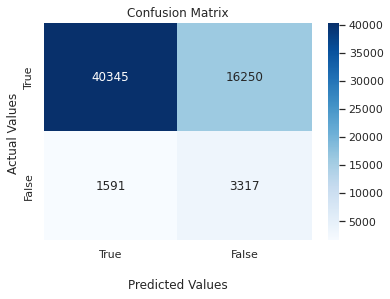

In [ ]:
cm = confusion_matrix(y_test, test_preds_df["TARGET"])
cnf_mat(cm, 'Confusion Matrix')

In [ ]:
data = test_preds_df
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH'])
data['DAYS_BIRTH'] = data['DAYS_BIRTH']/365

df_test['DAYS_BIRTH'] = abs(df_test['DAYS_BIRTH'])
df_test['DAYS_BIRTH'] = df_test['DAYS_BIRTH']/365

In [ ]:
y_pred_20 = data['TARGET'].loc[(data['DAYS_BIRTH'] >=20 ) & (data['DAYS_BIRTH'] < 40)]
y_pred_40 = data['TARGET'].loc[(data['DAYS_BIRTH'] >=40 ) & (data['DAYS_BIRTH'] < 60)]
y_pred_60 = data['TARGET'].loc[(data['DAYS_BIRTH'] >=60 )]

In [ ]:
y_test_20 = df_test['TARGET'].loc[(df_test['DAYS_BIRTH'] >=20 ) & (df_test['DAYS_BIRTH'] < 40)]
y_test_40 = df_test['TARGET'].loc[(df_test['DAYS_BIRTH'] >=40 ) & (df_test['DAYS_BIRTH'] < 60)]
y_test_60 = df_test['TARGET'].loc[(df_test['DAYS_BIRTH'] >=60 )]

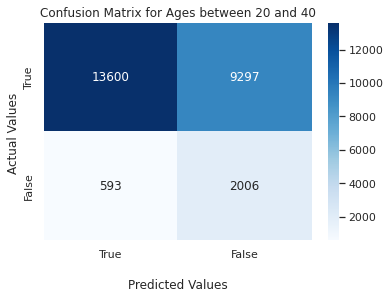

In [ ]:
cm = confusion_matrix(y_test_20, y_pred_20)
cnf_mat(cm, 'Confusion Matrix for Ages between 20 and 40')

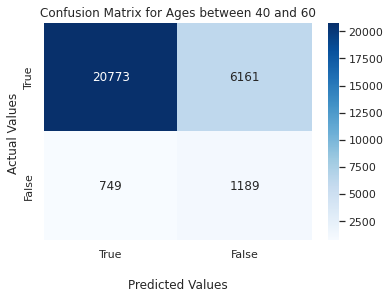

In [ ]:
cm = confusion_matrix(y_test_40, y_pred_40)
cnf_mat(cm, 'Confusion Matrix for Ages between 40 and 60')

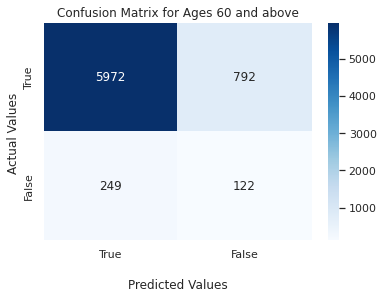

In [ ]:
cm = confusion_matrix(y_test_60, y_pred_60)
cnf_mat(cm, 'Confusion Matrix for Ages 60 and above')

In [ ]:
y_test_m = df_test['TARGET'].loc[(df_test['CODE_GENDER'] == 'M')]
y_pred_m = submission['TARGET'].loc[(submission['SK_ID_CURR'] == df_test['SK_ID_CURR']) & (df_test['CODE_GENDER'] == 'M')]

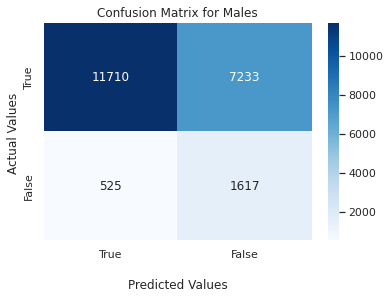

In [ ]:
cm = confusion_matrix(y_test_m, y_pred_m)
cnf_mat(cm, 'Confusion Matrix for Males')

In [ ]:
y_test_f = df_test['TARGET'].loc[(df_test['CODE_GENDER'] == 'F')]
y_pred_f = submission['TARGET'].loc[(submission['SK_ID_CURR'] == df_test['SK_ID_CURR']) & (df_test['CODE_GENDER'] == 'F')]

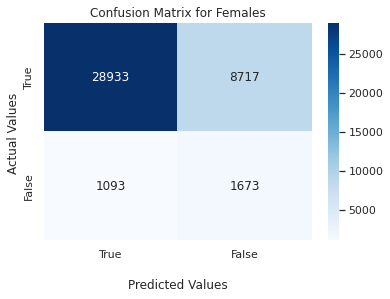

In [ ]:
cm = confusion_matrix(y_test_f, y_pred_f)
cnf_mat(cm, 'Confusion Matrix for Females')